In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('train.csv')

Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch

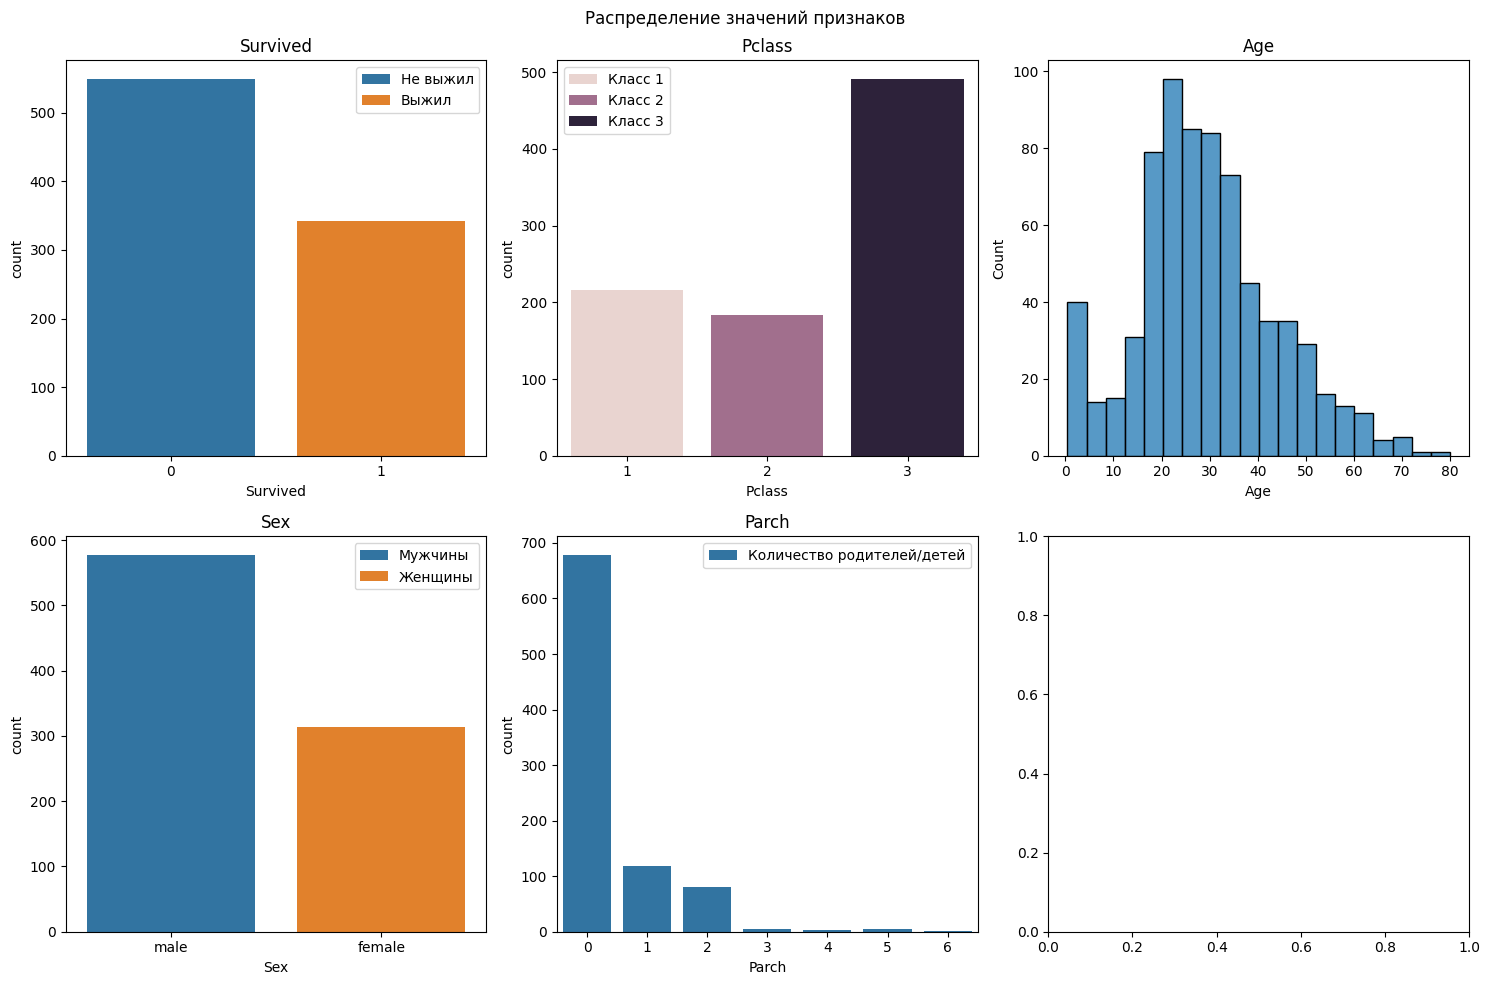

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Распределение значений признаков')

sns.countplot(data=df, x='Survived', hue='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survived')
axes[0, 0].legend(['Не выжил', 'Выжил'])

sns.countplot(data=df, x='Pclass', hue='Pclass', ax=axes[0, 1])
axes[0, 1].legend(['Класс 1', 'Класс 2', 'Класс 3'])
axes[0, 1].set_title('Pclass')

sns.histplot(data=df, x='Age', ax=axes[0, 2])
axes[0, 2].set_title('Age')

sns.countplot(data=df, x='Sex', hue='Sex', ax=axes[1, 0])
axes[1, 0].legend(['Мужчины', 'Женщины'])
axes[1, 0].set_title('Sex')

sns.countplot(data=df, x='Parch', ax=axes[1, 1])
axes[1, 1].set_title('Parch')
axes[1, 1].legend(['Количество родителей/детей'])

plt.tight_layout()
plt.show()

Постройте график типа boxplot для столбца Age

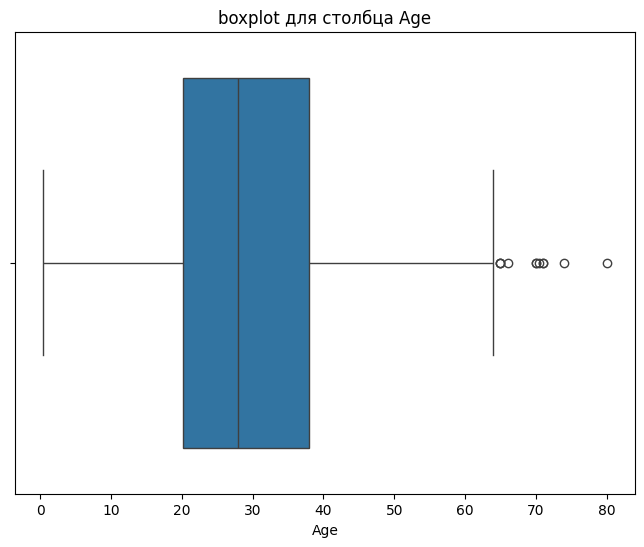

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age')
plt.title('boxplot для столбца Age')
plt.xlabel('Age')
plt.show()

Проинтепретируйте полученный график

Возраст пассажиров на Титанике имеет медианное значение примерно 28 лет
Первый квартиль (Q1) — около 20 лет, а третий квартиль (Q3) — около 38 лет
Минимальное значение (нижний ус) — около 0 лет, что соответствует младенцам
Максимальное значение (верхний ус) — около 55 лет, но выше этого уровня наблюдаются выбросы — возрастные значения от 60 до 80 лет, которые выделяются как редкие случаи


Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах

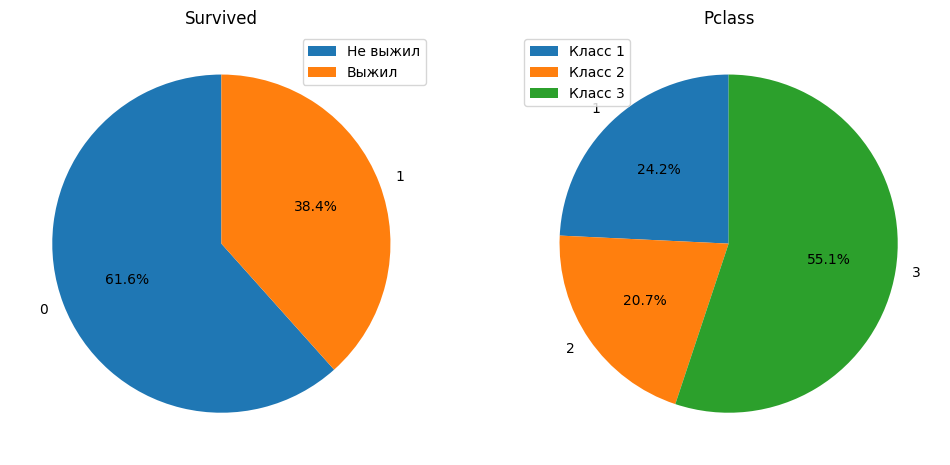

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

survived_counts = df['Survived'].value_counts()
axes[0].pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].legend(['Не выжил', 'Выжил'])
axes[0].set_title('Survived')

pclass_counts = df['Pclass'].value_counts().sort_index()
axes[1].pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].legend(['Класс 1', 'Класс 2', 'Класс 3'])
axes[1].set_title('Pclass')

plt.show()

Постройте график типа pairplot для всех числовых переменных датасета

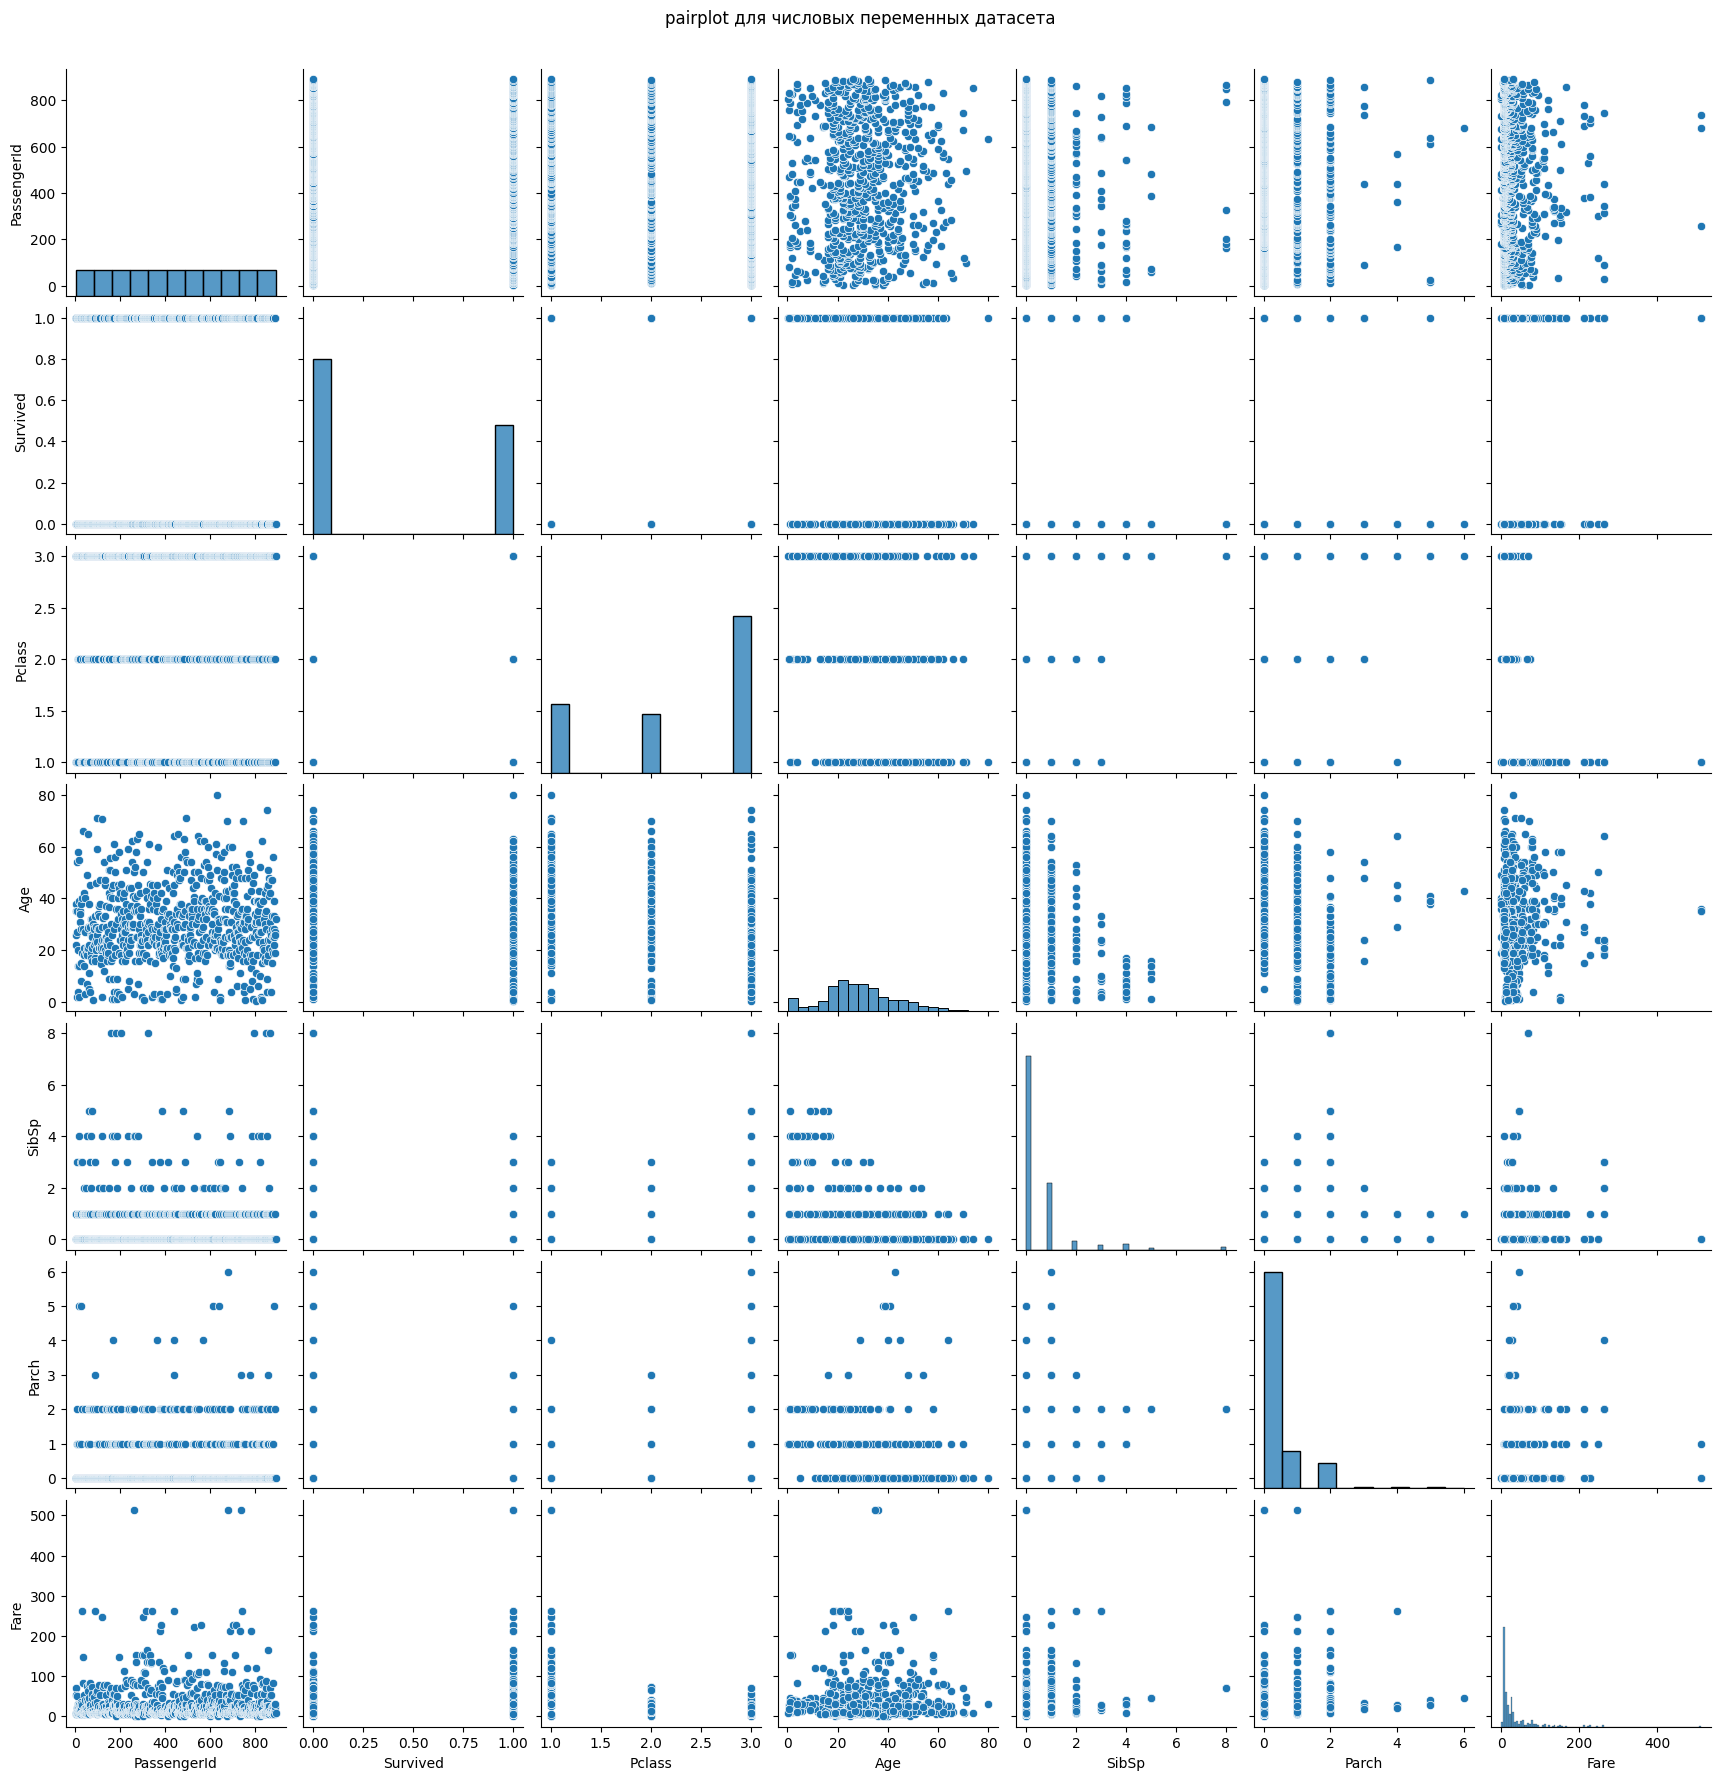

In [16]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('pairplot для числовых переменных датасета', y=1.02)
plt.show()

Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе

In [47]:
fig = px.sunburst(df, path=['Pclass', 'Sex'], values='PassengerId', title='sunburst plot по классам и полу')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()